<a href="https://colab.research.google.com/github/bryanathll/RoBERTa-based/blob/main/sentimen_analysis_with_RoBERTa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!cd ('/content/drive/MyDrive/roBERTa/')

Mounted at /content/drive
/bin/bash: -c: line 1: syntax error near unexpected token `'/content/drive/MyDrive/roBERTa/''
/bin/bash: -c: line 1: `cd ('/content/drive/MyDrive/roBERTa/')'


In [2]:
import csv
import numpy as np
import tensorflow as tf
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/roBERTa/data_sentiment_berita_1.csv')
df.columns

Index(['Unnamed: 0', 'title', 'sentiment'], dtype='object')

In [4]:
df.tail(10)

,Unnamed: 0,title,sentiment
5932,5932,Blak,0
5933,5933,Harga Minyak Dunia Melonjak 4 Persen Cadangan ...,1
5934,5934,Segera IPO Blibli Milik Grup Djarum Serius Sai...,1
5935,5935,Daftar HP Samsung yang Dapat Update One UI 50 ...,1
5936,5936,Buah Pandan Laut Ampuh Turunkan Kolesterol dan...,2
5937,5937,Akademisi Perlu kegiatan bagi Gen Z kampanyeka...,1
5938,5938,5 Museum Terbaik di Seoul Hadirkan Seni dan Se...,2
5939,5939,Pencegahan Infeksi Cacar Monyet Indonesia Baik,2
5940,5940,Raja Juli Minta Kader PSI Rajin Sowan ke Kiai,1
5941,5941,Pemprov Sulteng ajak warga jadikan museum temp...,1


In [5]:
df = df.rename(columns = {'Unnamed: 0':'id'})
df.columns


Index(['id', 'title', 'sentiment'], dtype='object')

In [6]:
df.sample(5)

,id,title,sentiment
4092,4092,Sekelompok Pria India Seru Asrama Mahasisw yan...,0
872,872,Mencermati persiapan dan kesiapan penyelenggar...,1
2107,2107,SM Entertainment Putuskan Kontrak Dengan Lee S...,1
3143,3143,Bocoran FIFA 23 EA Sudah Lakukan Face Scan dan...,1
3943,3943,Referendum Digelar Rusia Lancarkan Serangan Ba...,1


In [7]:
print(f'total dataset: {len(df)}')

total dataset: 5942


<function matplotlib.pyplot.show(close=None, block=None)>

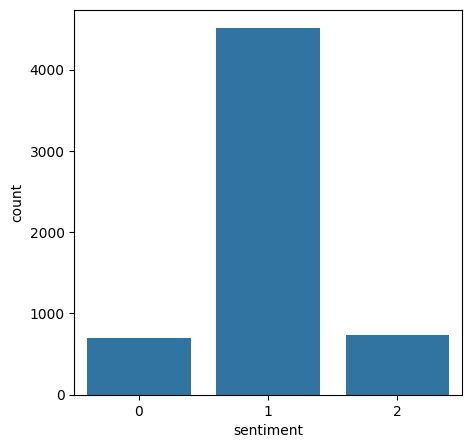

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))
sns.countplot(x=df['sentiment'])
plt.show

In [9]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline

tokenizer = AutoTokenizer.from_pretrained('w11wo/indonesian-roberta-base-sentiment-classifier')
model = AutoModelForSequenceClassification.from_pretrained('w11wo/indonesian-roberta-base-sentiment-classifier')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/328 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/808k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/467k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [10]:
pipe = pipeline('text-classification', model = 'w11wo/indonesian-roberta-base-sentiment-classifier')

In [11]:
nlp = pipeline(
    "sentiment-analysis",
    model=model,
    tokenizer=tokenizer
)

In [12]:
nlp("Jawab Tantangan Disrupsi Bidang Pendidikan Universitas Pelita Harapan Terapkan Sistem dari Oracle")

[{'label': 'neutral', 'score': 0.9977832436561584}]

In [14]:
sentiment_counts = df['sentiment'].value_counts()

In [15]:
sentiment_counts

1    4512
2     730
0     700
Name: sentiment, dtype: int64

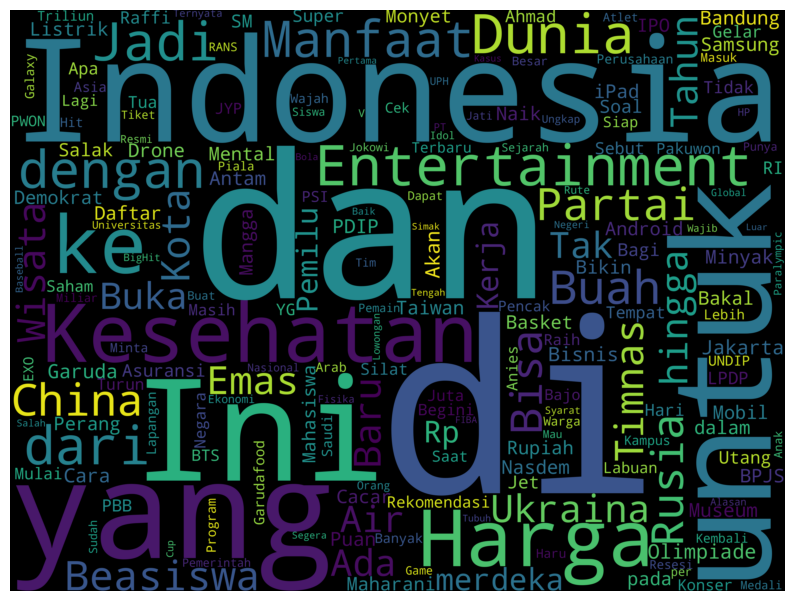

In [17]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
  plt.figure(figsize=(10, 8))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

all_words = ''.join([tweets for tweets in df['title']])

wordcloud = WordCloud(
    width = 4000,
    height=3000,
    random_state=3,
    background_color='black',
    colormap= 'viridis',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)